In [58]:
import glob
import numpy as np

In [59]:
#USING BOOLEAN OCCURANCE
#using 0 for B and 1 for M
list_of_filesB = glob.glob("Dataset-20201023T162720Z-001/Dataset/B/sys/*.txt")
list_of_filesM = glob.glob("Dataset-20201023T162720Z-001/Dataset/M/sys/*.txt")

In [60]:
def FileToList(filename):
    l = []
    f = open(filename)
    for line in f:
        l.append(line)
    f.close()
    return l

In [61]:
l = []
wordSet = set([])
for filename in list_of_filesB:
    l = FileToList(filename)
    wordSet = wordSet.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToList(filename)
    wordSet = wordSet.union(set(l))

In [62]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToList(filename)
    for word in l1:
        wordDict[word] = 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToList(filename)
    for word in l1:
        wordDict[word] = 1
    l.append(wordDict)
    output.append(1)

In [63]:
import pandas as pd

In [64]:
df = pd.DataFrame(l)

In [65]:
df['output'] = output

In [66]:
X = pd.DataFrame()
y = pd.DataFrame()

In [67]:
X = df.drop(['output'],axis='columns')
y = df.output

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [70]:
len(X_train),len(X_test),len(y_train),len(y_test)

(4076, 1747, 4076, 1747)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [72]:
model_LR = LogisticRegression()

In [73]:
model_LR.fit(X_train,y_train)

/home/markfirmware/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
accuracies = []

In [75]:
var = model_LR.score(X_test,y_test)

In [76]:
accuracies.append(var)

In [77]:
model_SVMLinear = SVC(kernel='linear')

In [78]:
model_SVMLinear.fit(X_train,y_train)

SVC(kernel='linear')

In [79]:
accuracies.append(model_SVMLinear.score(X_test,y_test))

In [80]:
model_SVMRBF = SVC(kernel='rbf')

In [81]:
model_SVMRBF.fit(X_train,y_train)

SVC()

In [82]:
accuracies.append(model_SVMRBF.score(X_test,y_test))

In [83]:
from matplotlib import pyplot as plt

In [84]:
from sklearn import metrics

In [85]:
def ROC(model,X_test,y_test):
    metrics.plot_roc_curve(model,X_test,y_test)

In [86]:
from sklearn.metrics import precision_recall_fscore_support

In [87]:
def PRINT_METRICS(model_name,y,y_pred,accuracies,index):
    l = []
    t = precision_recall_fscore_support(y,y_pred,average='macro')
    l.append(t[0])
    l.append(t[1])
    l.append(t[2])
    l.append(accuracies[index])
    print(model_name)
    print('Precision:'+str(l[0])+'|Recall:'+str(l[1])+'|F1_measure:'+str(l[2])+'|accuracy:'+str(l[3]))

In [88]:
#functions defined now will plot ROC curve and all the metrics separately
#First Logistics Regression
y = [] #this is to be used for all 
for val in y_test:
    y.append(val)

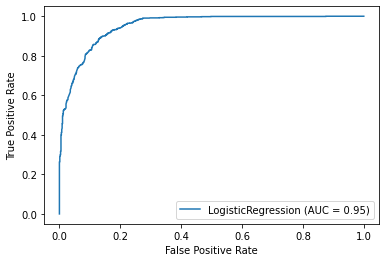

In [89]:
#plotting ROC for logistics regression
ROC(model_LR,X_test,y_test)

In [90]:
#printing metrics of Logistics Regression
y_pred = model_LR.predict(X_test)

In [91]:
PRINT_METRICS('MODEL:LOGISTICS_REGRESSION',y,y_pred,accuracies,0)

MODEL:LOGISTICS_REGRESSION
Precision:0.8821883535981049|Recall:0.8769490272744611|F1_measure:0.8789305200534154|accuracy:0.8809387521465369


In [92]:
#printing metrics of SVM(Linear)
y_pred = model_SVMLinear.predict(X_test)

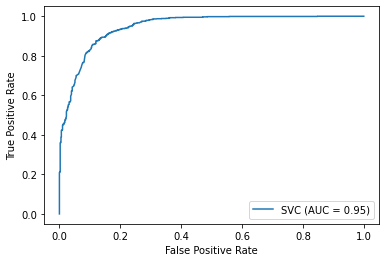

In [93]:
ROC(model_SVMLinear,X_test,y_test)

In [94]:
PRINT_METRICS('MODEL:SVM(LINEAR)',y,y_pred,accuracies,1)

MODEL:SVM(LINEAR)
Precision:0.8801985656908751|Recall:0.8753913948757073|F1_measure:0.8772391744165716|accuracy:0.8792215226101889


In [95]:
y_pred = model_SVMRBF.predict(X_test)

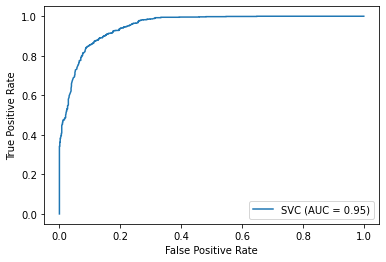

In [96]:
ROC(model_SVMRBF,X_test,y_test)

In [97]:
#printing metrics for SVM(RBF)
PRINT_METRICS('MODEL:SVM(RBF)',y,y_pred,accuracies,2)

MODEL:SVM(RBF)
Precision:0.877646802008295|Recall:0.8712092313560938|F1_measure:0.873517851179063|accuracy:0.8757870635374928


In [98]:
#NOW USING TF_IDF
def computeTF(wordDict,bow):
    tfDict = {}
    bowCount = len(bow)
    for word,count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [99]:
def computeIDF(docList):
    import math
    idfDict = {}
    n = len(docList)
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word,val in doc.items():
            if val>0:
                idfDict[word] += 1
    for word,val in idfDict.items():
        idfDict[word] = math.log((n)/float(val))
    return idfDict

In [100]:
def computeTFIDF(tfVec,idfs):
    tfidf = {}
    for word,val in tfVec.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [101]:
l = []
wordSet = set([])
for filename in list_of_filesB:
    l = FileToList(filename)
    wordSet = wordSet.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToList(filename)
    wordSet = wordSet.union(set(l))

In [102]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToList(filename)
    for word in l1:
        wordDict[word] += 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToList(filename)
    for word in l1:
        wordDict[word] += 1
    l.append(wordDict)
    output.append(1)

In [103]:
list_of_files = list_of_filesB+list_of_filesM

In [152]:
c = 0
TFS = []
for dictionary in l:
    filename = list_of_files[c]
    l1 = FileToList(filename)
    dictionary = computeTF(dictionary,l1)
    TFS.append(dictionary)
    c+=1

In [153]:
idfs = computeIDF(l)

In [154]:
TFIDFS = []
for dictionary in TFS:
    dictionary = computeTFIDF(dictionary,idfs)
    TFIDFS.append(dictionary)

In [155]:
df = pd.DataFrame(TFIDFS)

In [156]:
df['output'] = output

In [157]:
X = pd.DataFrame()
y = pd.DataFrame()
X = df.drop(['output'],axis='columns')
y = df.output

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
len(X_train),len(X_test),len(y_train),len(y_test)

(4076, 1747, 4076, 1747)

In [159]:
model_LR = LogisticRegression()

In [160]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [161]:
#storing the accuracies in the accuracies list
accuracies = []
accuracies.append(model_LR.score(X_test,y_test))

In [162]:
model_SVMLinear.fit(X_train,y_train)

SVC(kernel='linear')

In [163]:
accuracies.append(model_SVMLinear.score(X_test,y_test))

In [164]:
model_SVMRBF.fit(X_train,y_train)

SVC()

In [165]:
accuracies.append(model_SVMRBF.score(X_test,y_test))

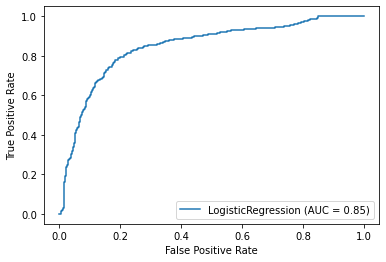

In [166]:
#printing metrics for Logistics Regression
ROC(model_LR,X_test,y_test)

In [167]:
y = []
for val in y_test:
    y.append(val)

In [168]:
y_pred = model_LR.predict(X_test)

In [169]:
PRINT_METRICS('MODEL:LOGISTICS_REGRESSION',y,y_pred,accuracies,0)

MODEL:LOGISTICS_REGRESSION
Precision:0.8021847683625611|Recall:0.5747703127177607|F1_measure:0.5106656949461239|accuracy:0.6376645678305667


In [170]:
#now printing for SVM_LINEAR
y_pred = model_SVMLinear.predict(X_test)

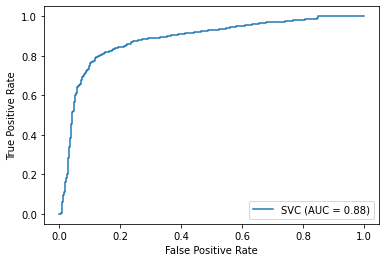

In [171]:
ROC(model_SVMLinear,X_test,y_test)

In [172]:
PRINT_METRICS('SVM(LINEAR)',y,y_pred,accuracies,1)

SVM(LINEAR)
Precision:0.8067278287461774|Recall:0.5752688172043011|F1_measure:0.5110534035271693|accuracy:0.6382369776760161


In [173]:
#now printing for SVM_RBF
y_pred = model_SVMRBF.predict(X_test)

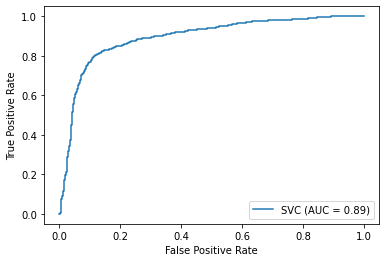

In [174]:
ROC(model_SVMRBF,X_test,y_test)

In [175]:
PRINT_METRICS('SVM(RBF)',y,y_pred,accuracies,2)

SVM(RBF)
Precision:0.7901384068381284|Recall:0.6834932031861405|F1_measure:0.6780277433068351|accuracy:0.725243274184316
